In [1]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score



import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

학습을 할 때 여러번 눌러서 결과를 확인해야했다. 좀 더 편하게 하기위해 반복문을 썼으나 실패했다. 반복할 때마다 tain과 test도 변해야하지만 실패했다. 여러가지 random을 써보았으나 방법을 찾지 못했다. 

각각 10번씩 해보니 svm의 정확도가 가장 높이 나왔다. 

(1797, 64)
<class 'sklearn.utils.Bunch'>
dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])


<Figure size 432x288 with 0 Axes>

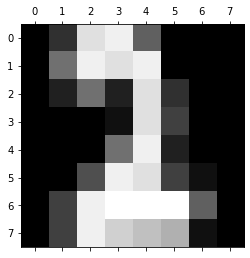

In [2]:
# https://url.kr/ye8q3o를 참조함.

digits = load_digits()
print(digits.data.shape) #총 1791개의 이미지가 있고 8x8로 이루어졌다.
print(type(digits))
print(digits.keys()) #data', 'target', 'frame', 'feature_names', 'target_names', 'images'이 있다.


plt.gray()
plt.matshow(digits.images[1780]) #그 중 1780번째의 이미지를 확인
plt.show() 

In [3]:
# 시각화
digits_data = digits.data  # feature_data 지정
digits_label = digits.target # Label Data 지정

print(digits.target.shape) 
print(digits.target_names) #Target Names 출력해 보기, 9개의 답.

digits_df = pd.DataFrame(data=digits_data,
                         columns=digits.feature_names)
digits_df["label"] = digits.target # 이것으로 0~9를 분류할 수 있다.

digits_df

# 앞서 1797의 이미지가 있고 이 이미지는 8X8이란 걸 알았고 표로 작성하였다. 

(1797,)
[0 1 2 3 4 5 6 7 8 9]


,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,label
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0,9
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0,0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0,8
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0,9


# 5가지의 학습 모델 중 SVM이 가장 정확도가 높았다.

In [4]:
# Decision Tree
from sklearn.model_selection import train_test_split



# 섞기 및 학습
for i in range(5):
    X_train, X_test, y_train, y_test = train_test_split(digits_data, 
                                                    digits_label, 
                                                    test_size =0.2, 
                                                    )

    print('X_train 개수: ', len(X_train),', X_test 개수: ', len(X_test))
    X_train.shape, y_train.shape # 확인
    X_test.shape, y_test.shape  # 확인

    decision_tree = DecisionTreeClassifier()
    print(decision_tree._estimator_type)

    # 학습 
    decision_tree.fit(X_train, y_train)

    #예측
    y_pred = decision_tree.predict(X_test)
    y_pred

     #정확도
    accuracy = accuracy_score(y_test, y_pred)
    print(accuracy)
    print(classification_report(y_test, y_pred))




X_train 개수:  1437 , X_test 개수:  360
classifier
0.85
              precision    recall  f1-score   support

           0       1.00      0.97      0.99        39
           1       0.84      0.76      0.80        50
           2       0.84      0.87      0.86        31
           3       0.93      0.85      0.89        33
           4       0.88      0.88      0.88        42
           5       0.76      0.85      0.80        33
           6       0.95      0.95      0.95        40
           7       0.82      0.87      0.84        31
           8       0.70      0.72      0.71        32
           9       0.73      0.76      0.75        29

    accuracy                           0.85       360
   macro avg       0.85      0.85      0.85       360
weighted avg       0.85      0.85      0.85       360

X_train 개수:  1437 , X_test 개수:  360
classifier
0.8361111111111111
              precision    recall  f1-score   support

           0       1.00      0.93      0.96        42
           1  

In [5]:
# RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

# 섞기 및 학습
for i in range(5):
    X2_train, X2_test, y2_train, y2_test = train_test_split(digits_data, 
                                                    digits_label, 
                                                    test_size=0.2)
                                                                                                
    random_forest = RandomForestClassifier()
    random_forest.fit(X2_train, y2_train)
    y2_pred = random_forest.predict(X2_test)

    accuracy2 = accuracy_score(y2_test, y2_pred)
    print(accuracy2)
    print(classification_report(y2_test, y2_pred))




0.9666666666666667
              precision    recall  f1-score   support

           0       1.00      0.97      0.98        31
           1       0.91      1.00      0.95        42
           2       1.00      1.00      1.00        33
           3       0.94      0.97      0.96        35
           4       0.98      1.00      0.99        40
           5       0.94      0.97      0.96        35
           6       1.00      0.97      0.98        33
           7       0.96      1.00      0.98        45
           8       0.97      0.86      0.91        36
           9       1.00      0.90      0.95        30

    accuracy                           0.97       360
   macro avg       0.97      0.96      0.97       360
weighted avg       0.97      0.97      0.97       360

0.9666666666666667
              precision    recall  f1-score   support

           0       0.95      1.00      0.98        41
           1       0.94      1.00      0.97        33
           2       1.00      0.95      0

In [6]:
# svm 모델
from sklearn import svm
svm_model = svm.SVC()

print(svm_model._estimator_type)

# 섞기 및 학습
for i in range(5):
    X3_train, X3_test, y3_train, y3_test = train_test_split(digits_data, 
                                                    digits_label, 
                                                    test_size=0.2)
                                                                                                
    random_forest = RandomForestClassifier()
    random_forest.fit(X3_train, y3_train)
    svm_model.fit(X_train, y_train)
    y3_pred = svm_model.predict(X3_test)



    accuracy3 = accuracy_score(y3_test, y3_pred)
    print(accuracy3)
    print(classification_report(y3_test, y3_pred))




classifier
0.9944444444444445
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        32
           1       1.00      1.00      1.00        34
           2       1.00      1.00      1.00        36
           3       1.00      0.98      0.99        42
           4       1.00      1.00      1.00        40
           5       0.96      1.00      0.98        44
           6       1.00      1.00      1.00        36
           7       1.00      1.00      1.00        29
           8       1.00      1.00      1.00        31
           9       1.00      0.97      0.99        36

    accuracy                           0.99       360
   macro avg       1.00      0.99      1.00       360
weighted avg       0.99      0.99      0.99       360

0.9916666666666667
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        28
           1       0.98      1.00      0.99        41
           2       1.00      

In [7]:

#SGD Classifier 모델
from sklearn.linear_model import SGDClassifier
sgd_model = SGDClassifier()

print(sgd_model._estimator_type)


# 섞기 및 학습
for i in range(5):
    X4_train, X4_test, y4_train, y4_test = train_test_split(digits_data, 
                                                    digits_label, 
                                                    test_size=0.2)
                                                                                                
    
    sgd_model.fit(X4_train, y4_train)
    y4_pred = sgd_model.predict(X_test)



    accuracy4 = accuracy_score(y4_test, y4_pred)
    print(accuracy4)
    print(classification_report(y4_test, y4_pred))





classifier
0.10555555555555556
              precision    recall  f1-score   support

           0       0.11      0.11      0.11        44
           1       0.08      0.07      0.08        42
           2       0.14      0.11      0.12        36
           3       0.08      0.09      0.08        34
           4       0.12      0.12      0.12        33
           5       0.12      0.10      0.11        40
           6       0.02      0.04      0.03        27
           7       0.18      0.15      0.17        39
           8       0.15      0.23      0.18        31
           9       0.04      0.03      0.03        34

    accuracy                           0.11       360
   macro avg       0.11      0.11      0.10       360
weighted avg       0.11      0.11      0.11       360

0.09722222222222222
              precision    recall  f1-score   support

           0       0.05      0.05      0.05        39
           1       0.09      0.12      0.10        34
           2       0.10    

In [8]:
#Logistic Regression 모델
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression(max_iter=3000)
# https://url.kr/aqxgue에서 max_iter=(3000)를 알게됨

print(logistic_model._estimator_type)


# 섞기 및 학습

X5_train, X5_test, y5_train, y5_test = train_test_split(digits_data, 
                                                    digits_label, 
                                                    test_size=0.2)
                                                                                                
for i in range(5):  # 계산하는데 시간이 어느정도 걸린다.
    logistic_model.fit(X_train, y_train)
    y5_pred = logistic_model.predict(X5_test)

    accuracy5 = accuracy_score(y5_test, y5_pred)
    print(accuracy5)
    print(classification_report(y5_test, y5_pred))


classifier
0.9916666666666667
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        30
           1       1.00      1.00      1.00        44
           2       1.00      1.00      1.00        38
           3       1.00      1.00      1.00        30
           4       1.00      1.00      1.00        37
           5       0.97      1.00      0.99        37
           6       1.00      1.00      1.00        42
           7       1.00      0.97      0.99        36
           8       0.97      0.97      0.97        29
           9       0.97      0.97      0.97        37

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360

0.9916666666666667
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        30
           1       1.00      1.00      1.00        44
           2       1.00      